# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Obtaining and organizing stock data from Google Finance

In [2]:
# import data reader package
import pandas_datareader as pdr

# read data from Yahoo! Finance for a specific 
# stock specified by ticker and between the start and end dates
def get_stock_data(ticker, start, end):
    # read the data
    data = pdr.data.DataReader(ticker, 'yahoo', start, end)

    # rename this column
    data.insert(0, "Ticker", ticker)
    return data

In [3]:
# request the three years of data for MSFT
start = datetime(2012, 1, 1)
end = datetime(2014, 12, 31)
get_stock_data("MSFT", start, end)[:5]

           Ticker       High        Low       Open  \
Date                                                 
2012-01-03   MSFT  26.959999  26.389999  26.549999   
2012-01-04   MSFT  27.469999  26.780001  26.820000   
2012-01-05   MSFT  27.730000  27.290001  27.379999   
2012-01-06   MSFT  28.190001  27.530001  27.530001   
2012-01-09   MSFT  28.100000  27.719999  28.049999   

                Close      Volume  Adj Close  
Date                                          
2012-01-03  26.770000  64731500.0  22.080940  
2012-01-04  27.400000  80516100.0  22.600586  
2012-01-05  27.680000  56081400.0  22.831539  
2012-01-06  28.110001  99455500.0  23.186216  
2012-01-09  27.740000  59706800.0  22.881027  

In [4]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
def get_data_for_multiple_stocks(tickers, start, end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker, start, end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [5]:
# get the data for all the stocks that we want
raw = get_data_for_multiple_stocks(
    ["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", "UAL", "PEP", "KO"],
    start, end)

In [6]:
# take a peek at the data for MSFT
raw['MSFT'][:5]

           Ticker       High        Low       Open  \
Date                                                 
2012-01-03   MSFT  26.959999  26.389999  26.549999   
2012-01-04   MSFT  27.469999  26.780001  26.820000   
2012-01-05   MSFT  27.730000  27.290001  27.379999   
2012-01-06   MSFT  28.190001  27.530001  27.530001   
2012-01-09   MSFT  28.100000  27.719999  28.049999   

                Close      Volume  Adj Close  
Date                                          
2012-01-03  26.770000  64731500.0  22.080940  
2012-01-04  27.400000  80516100.0  22.600586  
2012-01-05  27.680000  56081400.0  22.831539  
2012-01-06  28.110001  99455500.0  23.186216  
2012-01-09  27.740000  59706800.0  22.881027  

In [7]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

In [8]:
# do the pivot
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

Ticker             AA       AAPL   DAL  ...       MSFT  \
Date                                    ...              
2012-01-03  22.179689  58.747143  8.04  ...  26.770000   
2012-01-04  22.708349  59.062859  8.01  ...  27.400000   
2012-01-05  22.492081  59.718571  8.33  ...  27.680000   
2012-01-06  22.011480  60.342857  8.32  ...  28.110001   
2012-01-09  22.660290  60.247143  8.28  ...  27.740000   

Ticker            PEP        UAL  
Date                              
2012-01-03  66.400002  18.900000  
2012-01-04  66.739998  18.520000  
2012-01-05  66.220001  18.389999  
2012-01-06  65.389999  18.209999  
2012-01-09  65.730003  17.930000  

[5 rows x 9 columns]

# Plotting time-series prices

In [9]:
# plot the closing prices of AAPL
close_px['AAPL'].plot();

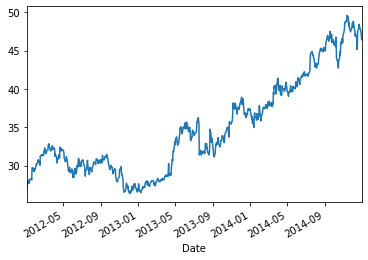

In [10]:
# plot the closing prices of MSFT
close_px['MSFT'].plot();

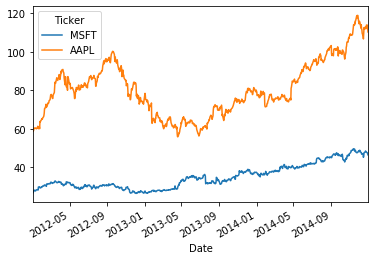

In [11]:
# plot MSFT vs AAPL on the same chart
close_px[['MSFT', 'AAPL']].plot();

In [12]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker             AA        AAPL        DAL  ...  \
Date                                          ...   
2014-12-24  2057400.0  14479600.0  4296200.0  ...   
2014-12-26  2644900.0  33721000.0  5303100.0  ...   
2014-12-29  2949500.0  27598900.0  6656700.0  ...   
2014-12-30  3854300.0  29881500.0  7318900.0  ...   
2014-12-31  3679600.0  41403400.0  7772200.0  ...   

Ticker            MSFT        PEP        UAL  
Date                                          
2014-12-24  11437800.0  1604100.0  2714300.0  
2014-12-26  13197800.0  1492700.0  3062200.0  
2014-12-29  14439500.0  2453800.0  2874300.0  
2014-12-30  16384700.0  2134400.0  2644600.0  
2014-12-31  21552500.0  3727400.0  4440500.0  

[5 rows x 9 columns]

In [13]:
# plot the volume for MSFT
msft_volume = volumes[["MSFT"]]
plt.bar(msft_volume.index, msft_volume["MSFT"])
plt.gcf().set_size_inches(15,8)

In [14]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], 
         label='MSFT Close')
plt.title('MSFT Close Price 2012 - 2014')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Calculating simple daily percentage change

In [15]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2012-01-03       NaN       NaN       NaN  ...       NaN   
2012-01-04  0.023835  0.005374 -0.003731  ...  0.023534   
2012-01-05 -0.009524  0.011102  0.039950  ...  0.010219   
2012-01-06 -0.021368  0.010454 -0.001201  ...  0.015535   
2012-01-09  0.029476 -0.001586 -0.004808  ... -0.013163   

Ticker           PEP       UAL  
Date                            
2012-01-03       NaN       NaN  
2012-01-04  0.005120 -0.020106  
2012-01-05 -0.007791 -0.007019  
2012-01-06 -0.012534 -0.009788  
2012-01-09  0.005200 -0.015376  

[5 rows x 9 columns]

In [16]:
# check the percentage on 2012-01-05
close_px.loc['2012-01-05']['AAPL'] / \
    close_px.loc['2012-01-04']['AAPL'] -1

0.011101936875951512

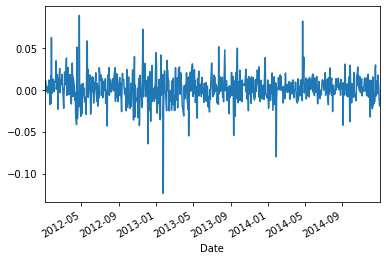

In [17]:
# plot daily percentage change for AAPL
daily_pc["AAPL"].plot();

# Calculating simple daily cumulative returns

In [18]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2012-01-03       NaN       NaN       NaN  ...       NaN   
2012-01-04  1.023835  1.005374  0.996269  ...  1.023534   
2012-01-05  1.014085  1.016536  1.036070  ...  1.033993   
2012-01-06  0.992416  1.027162  1.034826  ...  1.050056   
2012-01-09  1.021668  1.025533  1.029851  ...  1.036235   

Ticker           PEP       UAL  
Date                            
2012-01-03       NaN       NaN  
2012-01-04  1.005120  0.979894  
2012-01-05  0.997289  0.973016  
2012-01-06  0.984789  0.963492  
2012-01-09  0.989910  0.948677  

[5 rows x 9 columns]

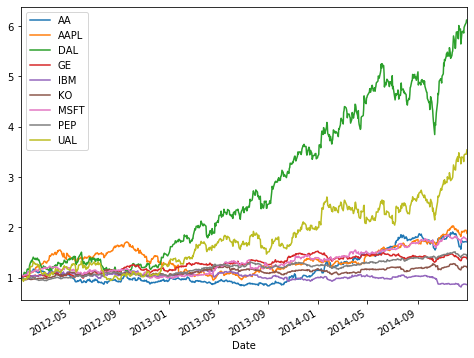

In [19]:
# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2);

# Resampling data from daily to monthly returns

In [20]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker             AA       AAPL    DAL  ...       MSFT  \
Date                                     ...              
2012-01-31  24.414480  65.211426  10.55  ...  29.530001   
2012-02-29  24.438511  77.491432   9.81  ...  31.740000   
2012-03-31  24.438511  77.491432   9.81  ...  31.740000   
2012-04-30  23.381189  83.425713  10.96  ...  32.020000   
2012-05-31  20.545650  82.532860  12.10  ...  29.190001   

Ticker            PEP    UAL  
Date                          
2012-01-31  65.669998  23.10  
2012-02-29  62.939999  20.65  
2012-03-31  62.939999  20.65  
2012-04-30  66.000000  21.92  
2012-05-31  67.849998  25.17  

[5 rows x 9 columns]

In [21]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2012-01-31       NaN       NaN       NaN  ...       NaN   
2012-02-29  0.000984  0.188311 -0.070142  ...  0.074839   
2012-03-31  0.000000  0.000000  0.000000  ...  0.000000   
2012-04-30 -0.043265  0.076580  0.117227  ...  0.008822   
2012-05-31 -0.121274 -0.010702  0.104015  ... -0.088382   

Ticker           PEP       UAL  
Date                            
2012-01-31       NaN       NaN  
2012-02-29 -0.041571 -0.106061  
2012-03-31  0.000000  0.000000  
2012-04-30  0.048618  0.061501  
2012-05-31  0.028030  0.148266  

[5 rows x 9 columns]

In [22]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2012-01-31       NaN       NaN       NaN  ...       NaN   
2012-02-29  1.000984  1.188311  0.929858  ...  1.074839   
2012-03-31  1.000984  1.188311  0.929858  ...  1.074839   
2012-04-30  0.957677  1.279311  1.038863  ...  1.084321   
2012-05-31  0.841535  1.265620  1.146919  ...  0.988486   

Ticker           PEP       UAL  
Date                            
2012-01-31       NaN       NaN  
2012-02-29  0.958429  0.893939  
2012-03-31  0.958429  0.893939  
2012-04-30  1.005025  0.948918  
2012-05-31  1.033196  1.089610  

[5 rows x 9 columns]

In [23]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2);

# Analyzing distribution of returns

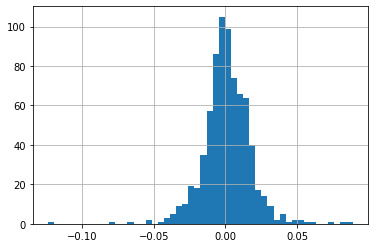

In [24]:
# histogram of the daily percentage change for AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

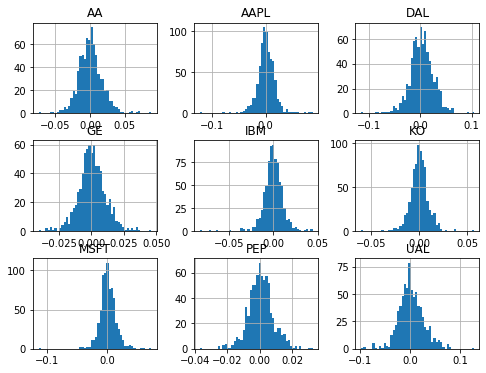

In [25]:
# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(8,6));

# Performing moving average calculation

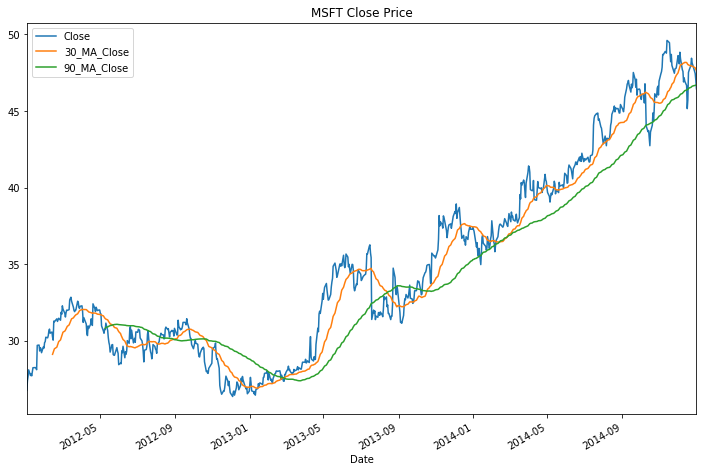

In [26]:
# extract just MSFT close
msft_close = close_px[['MSFT']]['MSFT']
# calculate the 30 and 90 day rolling means
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': msft_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12,8)

# Comparision of average daily returns across stocks

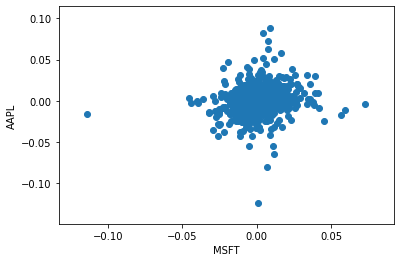

In [27]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

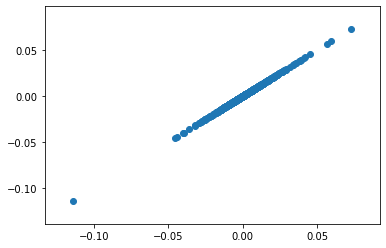

In [28]:
# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

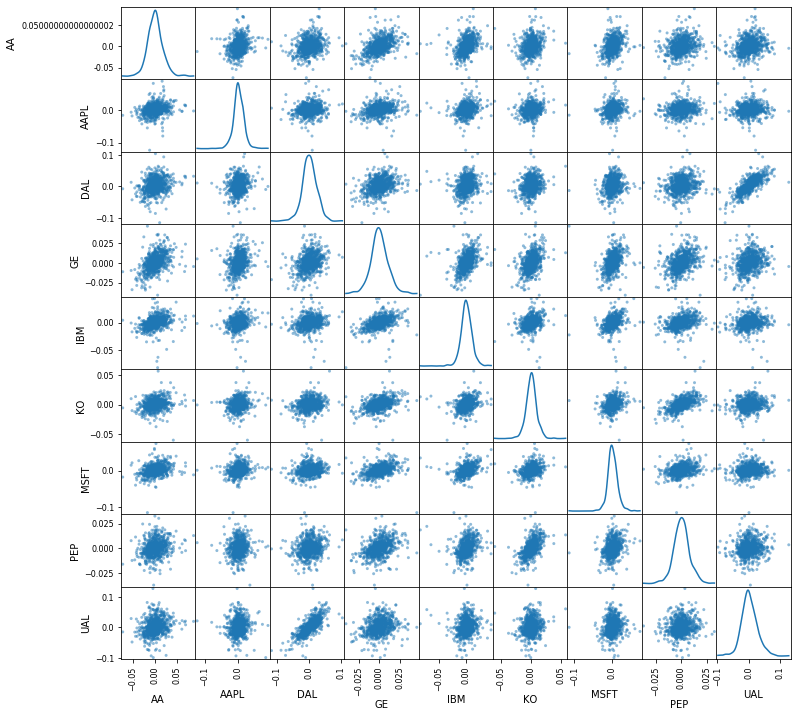

In [29]:
from pandas.plotting import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

# Correlation of stocks based upon daily percentage change of closing price

In [30]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker        AA      AAPL       DAL  ...      MSFT  \
Ticker                                ...             
AA      1.000000  0.238155  0.250570  ...  0.310952   
AAPL    0.238155  1.000000  0.136758  ...  0.182782   
DAL     0.250570  0.136758  1.000000  ...  0.152909   
GE      0.458091  0.238881  0.318261  ...  0.340142   
IBM     0.311186  0.213496  0.166218  ...  0.354350   
KO      0.225809  0.157887  0.187431  ...  0.267558   
MSFT    0.310952  0.182782  0.152909  ...  1.000000   
PEP     0.221750  0.096902  0.174172  ...  0.280875   
UAL     0.221425  0.061735  0.761222  ...  0.128079   

Ticker       PEP       UAL  
Ticker                      
AA      0.221750  0.221425  
AAPL    0.096902  0.061735  
DAL     0.174172  0.761222  
GE      0.373410  0.236525  
IBM     0.252805  0.122614  
KO      0.553574  0.139971  
MSFT    0.280875  0.128079  
PEP     1.000000  0.124301  
UAL     0.124301  1.000000  

[9 rows x 9 columns]

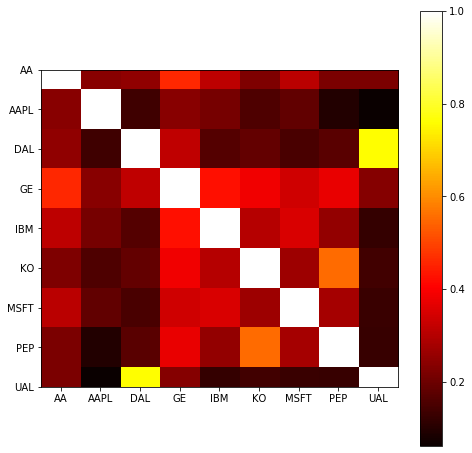

In [31]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Volatility

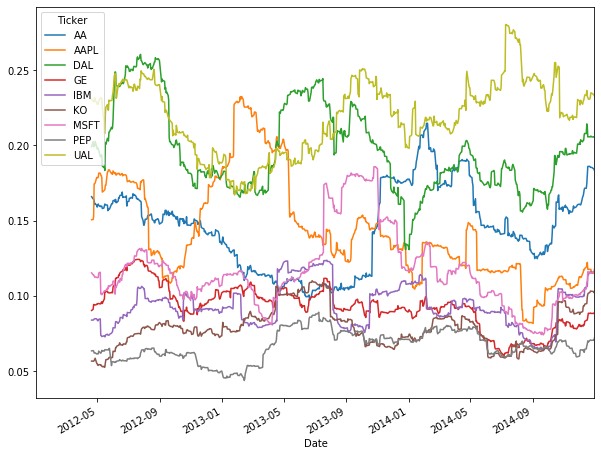

In [32]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10, 8));

# Determining risk relative to expected returns

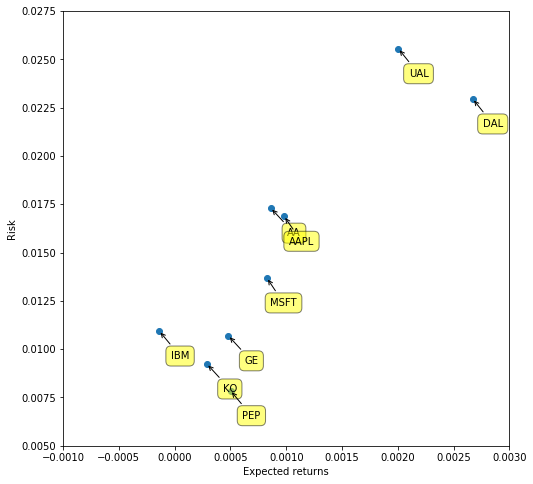

In [33]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set size
plt.gcf().set_size_inches(8,8)